In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_c = pd.read_csv('train.csv')
df_b = pd.read_csv('test.csv')

In [3]:
df_a.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [224]:
train_data.groupby(['income_>50K']).count()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Nicaragua,Philippines,Poland,Portugal,Puerto-Rico,South,Taiwan,Thailand,Trinadad&Tobago,United-States
income_>50K,,,,,,,,,,,,,,,,,,,,,
0,30310,30310,30310,30310,30310,30310,30310,30310,30310,30310,...,30310,30310,30310,30310,30310,30310,30310,30310,30310,30310
1,10002,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,10002,10002,10002,10002,10002,10002,10002,10002,10002,10002


In [5]:
df_a.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [97]:
print(df_b.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB
None


In [93]:
df_a.dropna(axis=0, inplace=True)

In [4]:
def find_missing_values(df):
    
    total = df.isnull().sum().sort_values(ascending=False) # compute the total number of missing values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # compute the percentage of missing values
    missing_data = pd.concat([total, percent], axis=1, keys=['Total_missing_value', 'Percent']) # add all information to one dataframe
    missing_data = missing_data[missing_data['Total_missing_value']>0] # filter the dataframe to only the features with missing values
    return missing_data

df_missing_values = find_missing_values(df_c)
df_missing_values


,Total_missing_value,Percent
occupation,2506,0.057010
workclass,2498,0.056828
native-country,763,0.017358


In [109]:
country = (df_b['native-country'].unique())
df2 =df_a.loc[df_a['native-country'].isin (country)] # taking only rows which test data have


In [126]:
work = (df_b['workclass'].unique())
df_train =df2.loc[df2['workclass'].isin (work)]

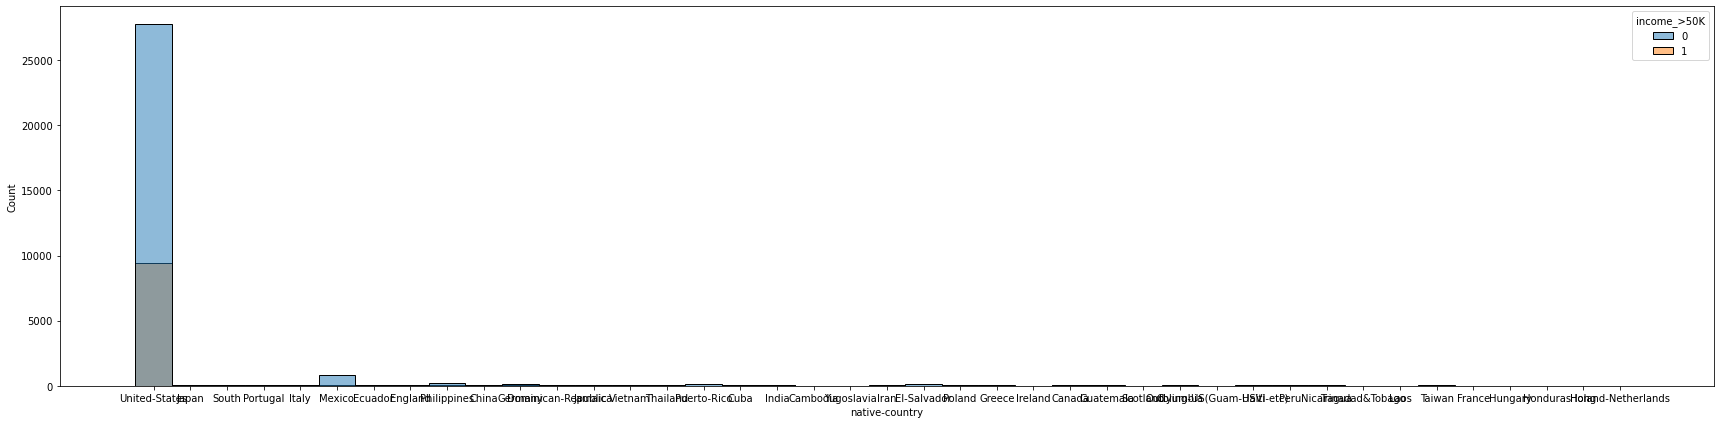

In [127]:
plt.figure(figsize=(24,6))
sns.histplot(data = df_a, x='native-country',hue='income_>50K')
plt.tight_layout()

In [123]:
len(df2['relationship'].unique())


6

In [125]:
len((df_b['relationship'].unique()))

6

In [95]:
df_a.groupby(['native-country']).count()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income_>50K
native-country,,,,,,,,,,,,,,
Cambodia,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Canada,139,139,139,139,139,139,139,139,139,139,139,139,139,139
China,106,106,106,106,106,106,106,106,106,106,106,106,106,106
Columbia,72,72,72,72,72,72,72,72,72,72,72,72,72,72
Cuba,120,120,120,120,120,120,120,120,120,120,120,120,120,120
Dominican-Republic,91,91,91,91,91,91,91,91,91,91,91,91,91,91
Ecuador,40,40,40,40,40,40,40,40,40,40,40,40,40,40
El-Salvador,137,137,137,137,137,137,137,137,137,137,137,137,137,137
England,102,102,102,102,102,102,102,102,102,102,102,102,102,102


In [128]:
df_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [161]:
workclasstrain = pd.get_dummies(df_train['workclass'], drop_first=True)


,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
43952,0,1,0,0,0
43953,0,1,0,0,0
43954,0,1,0,0,0
43955,0,1,0,0,0


In [148]:
native_countrytrain = pd.get_dummies(df_train['native-country'], drop_first=True)


In [143]:
educationtrain = pd.get_dummies(df_train['education'], drop_first=True)

In [147]:
occupationtrain = pd.get_dummies(df_train['occupation'], drop_first=True)

In [ ]:
relationshiptrain = pd.get_dummies(df_train['relationship'], drop_first=True)

In [146]:
racetrain = pd.get_dummies(df_train['race'], drop_first=True)

In [145]:
gendertrain = pd.get_dummies(df_train['gender'], drop_first=True)

In [156]:
maritaltrain = pd.get_dummies(df_train['marital-status'], drop_first=True)

In [157]:
train_data = pd.concat([df_train,workclasstrain,educationtrain,maritaltrain,occupationtrain,relationshiptrain,racetrain,gendertrain,native_countrytrain], axis = 1 )

In [142]:
train_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,Nicaragua,Philippines,Poland,Portugal,Puerto-Rico,South,Taiwan,Thailand,Trinadad&Tobago,United-States
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,...,0,0,0,0,0,0,0,0,0,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,...,0,0,0,0,0,0,0,0,0,1
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,0,0,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,...,0,0,0,0,0,0,0,0,0,1
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,...,0,0,0,0,0,0,0,0,0,1


In [164]:
train_data['Male']

0        1
1        1
2        1
3        1
4        1
        ..
43952    1
43953    0
43954    1
43955    0
43956    1
Name: Male, Length: 40312, dtype: uint8

In [170]:
test_train.drop(['workclass','education',
       'marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'],axis=1, inplace=True)
train_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,Local-gov,Private,Self-emp-inc,...,Nicaragua,Philippines,Poland,Portugal,Puerto-Rico,South,Taiwan,Thailand,Trinadad&Tobago,United-States
0,67,366425,16,99999,0,60,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,17,244602,8,0,0,15,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,31,174201,13,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,58,110199,4,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,25,149248,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [182]:
workclasstrain1 = pd.get_dummies(df_b['workclass'], drop_first=True)

In [183]:
native_countrytrain1 = pd.get_dummies(df_b['native-country'], drop_first=True)

In [184]:
educationtrain1 = pd.get_dummies(df_b['education'], drop_first=True)

In [185]:
occupationtrain1 = pd.get_dummies(df_b['occupation'], drop_first=True)

In [186]:
relationshiptrain1 = pd.get_dummies(df_b['relationship'], drop_first=True)

In [187]:
racetrain1 = pd.get_dummies(df_b['race'], drop_first=True)

In [188]:
gendertrain1 = pd.get_dummies(df_b['gender'], drop_first=True)

In [189]:
maritaltrain1 = pd.get_dummies(df_b['marital-status'], drop_first=True)

In [190]:
test_data = pd.concat([df_b,workclasstrain1,educationtrain1,maritaltrain1,occupationtrain1,relationshiptrain1,racetrain1,gendertrain1,native_countrytrain1], axis = 1 )

In [193]:
test_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
       '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
       'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
       'Preschool', 'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
 

In [195]:
test_data.drop(['workclass','education',
       'marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'],axis=1, inplace=True)

In [196]:
test_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Nicaragua,Philippines,Poland,Portugal,Puerto-Rico,South,Taiwan,Thailand,Trinadad&Tobago,United-States
0,39,327120,9,0,0,40,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,32,123253,12,0,0,42,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,47,232628,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19,374262,8,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,46,311231,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [197]:
X= train_data.drop('income_>50K',axis=1)

In [198]:
y = train_data['income_>50K']

In [202]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [205]:
from sklearn.linear_model import LogisticRegression

In [206]:
logmodel = LogisticRegression()

In [226]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [227]:
prediction = logmodel.predict(X_test)

In [228]:
from sklearn.metrics import classification_report

In [229]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      6054
           1       0.71      0.26      0.39      2009

    accuracy                           0.79      8063
   macro avg       0.76      0.61      0.63      8063
weighted avg       0.78      0.79      0.75      8063



In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
ran_cla = RandomForestClassifier()

In [234]:
ran_cla.fit(X_train,y_train)

RandomForestClassifier()

In [235]:
prediction1 = ran_cla.predict(X_test)

In [236]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3035
           1       0.76      0.63      0.69       997

    accuracy                           0.86      4032
   macro avg       0.82      0.78      0.80      4032
weighted avg       0.85      0.86      0.85      4032



In [217]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [219]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.790061,0.255518,0.709378
Support Vector Machines,0.772863,0.084950,0.958491
Decision Trees,0.808004,0.618060,0.610304
Random Forest,0.854969,0.633779,0.741973
Naive Bayes,0.785596,0.292642,0.646711
K-Nearest Neighbor,0.768811,0.318729,0.556659


In [237]:
prediction2 = ran_cla.predict(test_data)

In [238]:
type(prediction2)

numpy.ndarray

In [246]:
df_p = pd.DataFrame(prediction2,columns=['outcome'])

In [248]:
df_p.rename_axis('id').reset_index()

,id,outcome
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
894,894,0
895,895,0
896,896,0
897,897,0


In [251]:
df_p.to_csv('prediction.csv',index_label='id')